In [0]:

import warnings; 
warnings.simplefilter('ignore')

In [32]:
pip install unidecode

In [33]:
pip install pyLDAvis

In [36]:
!pip install -U spacy


Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [37]:
!python -m spacy download pt

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [0]:
import pandas as pd
import spacy


In [0]:
nlp = spacy.load('pt')


{'encontrar'}

In [0]:
diretorio ='/content/tweets_@portalR7.csv'  

In [0]:
    data = pd.read_csv(diretorio, error_bad_lines=False);


In [47]:
data.head(1)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,Mais de um terço de pacientes internados com C...,False,447,NaN,2020-05-16 03:00:00,True,NaN,1.261492e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",g1,85.0,False,False,NaN,NaN


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           786 non-null    object 
 1   favorited      782 non-null    object 
 2   favoriteCount  786 non-null    object 
 3   replyToSN      41 non-null     object 
 4   created        786 non-null    object 
 5   truncated      786 non-null    bool   
 6   replyToSID     35 non-null     object 
 7   id             782 non-null    float64
 8   replyToUID     37 non-null     float64
 9   statusSource   782 non-null    object 
 10  screenName     782 non-null    object 
 11  retweetCount   782 non-null    float64
 12  isRetweet      782 non-null    object 
 13  retweeted      782 non-null    object 
 14  longitude      0 non-null      float64
 15  latitude       0 non-null      float64
dtypes: bool(1), float64(5), object(10)
memory usage: 93.0+ KB


In [0]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import tqdm
from unidecode import unidecode
import pyLDAvis
import pyLDAvis.gensim
import pickle 
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel
import spacy



In [155]:
# Retire o comentário apenas na primeira vez que executar esse notebook no seu ambiente
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [0]:
lista_stopwords = []

stopwords_pt = nltk.corpus.stopwords.words('portuguese')
custon_stop_words = ['nessa','todo','pra','vou','aqui','se','.',',','lá','vcs','""','"',':','globonews']

custon_stop_words = custon_stop_words +['veja','apos','sobre','globonews','anos','blog','dias','novo','contra','fazem','nesta','feira','sobre','cada'
,'quase','pode','hoje','durante','meio','defende','nesta']
punctuation = list(string.punctuation)

palavras_incorretas =['bwinbgwezf','tvwywayleb','wrkxfscoi','yxymvyrjyo','bwinbgwezf','klupeymt','pdbhahcj','yxymvyrjyo','bwinbgwezf','klupeymt','pdbhahcj','tvwywayleb','xafc','nyxe','irqrs','jihk']

palavras_incorretas.append('dkoll')
palavras_incorretas.append('lirscbw')
palavras_incorretas.append('tkindkmz')
palavras_incorretas.append('xrduwmia')
palavras_incorretas.append('abyxd')
palavras_incorretas.append('jrhlzojhhr')
palavras_incorretas.append('salw')
palavras_incorretas.append('xjpi')
palavras_incorretas.append('giphy')
palavras_incorretas.append('gicc')
palavras_incorretas.append('uqdgof')
palavras_incorretas.append('govectt')
palavras_incorretas.append('gvzkhof')
palavras_incorretas.append('wlxnqiflyf')
palavras_incorretas.append('evcf')
palavras_incorretas.append('klupeymt')
palavras_incorretas.append('bwinbgwezf')
palavras_incorretas.append('nyxe')
palavras_incorretas.append('rfsx')
palavras_incorretas.append('pdbhahc')
palavras_incorretas.append('jclvyz')
palavras_incorretas.append('ebsaxxgd')
palavras_incorretas.append('jclvyz')
palavras_incorretas.append('yxymvyrjyo')
palavras_incorretas.append('wrkxfscoi')
palavras_incorretas.append('klupeymt')
palavras_incorretas.append('jznus')
palavras_incorretas.append('nerukfmgpi')
palavras_incorretas.append('yzkolzb')
palavras_incorretas.append('bblyxam')
palavras_incorretas.append('pujmnafipd')
palavras_incorretas.append('qttwneie')
palavras_incorretas.append('tnbcpfuz')
palavras_incorretas.append('ufmcjekbed')
palavras_incorretas.append('fzrkmdu')
palavras_incorretas.append('owblkntxvb')
palavras_incorretas.append('guuzlngikg')
palavras_incorretas.append('clxixptdy')

lista_stopwords.extend(stopwords_pt)
lista_stopwords.extend(custon_stop_words)
lista_stopwords.extend(punctuation)
lista_stopwords.extend(palavras_incorretas)



In [66]:
len(lista_stopwords)

302

In [0]:
def remove_caracteres_especiais(texto):
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    remove = ''.join([i for i in texto if not i in punctuations])
    remove_1 =  re.sub(r" ?\([^)]+\)", "", remove)
    remove_2 =''.join(remove_1).replace("'", " ")
    remove_3 =''.join(remove_2).replace("[", " ")
    remove_4 =''.join(remove_3).replace("]", " ")
    return str(remove_4)    

In [0]:
def ContemVogal(texto):
  vogais = ['a', 'e', 'i', 'o', 'u']
  temVogal =False
    
  for c in texto.lower():
    if c in vogais:
        temVogal = True
        break

  return temVogal;
  

In [0]:
def remove_url(txt):
    return re.sub(r'http\S+', '', txt)

In [0]:
def preprocess(text):
    result = []
    doc = nlp(text)
    linhas = []
    for token in doc:
        if str(token) not in lista_stopwords and len(token) > 3:
            radical = (token.lemma_)
            linhas.append(radical)
    for w in linhas:
        texto_rad = " ".join(linhas)
    for token in gensim.utils.simple_preprocess(texto_rad):
        token =remove_caracteres_especiais(token)
        token =remove_url(token)
        palavra =remove_caracteres_especiais(token)
        if palavra not in lista_stopwords and len(palavra) > 3:
          if(ContemVogal(palavra)):
            result.append(unidecode(palavra))
            
    return result



In [0]:
data_text = data[['text']]
data_text['index'] = data_text.index
documents = data_text

In [0]:

processed_docs = documents['text'].map(preprocess).apply(lambda x : list(nltk.ngrams(x, 1)))
processed_docs = [["".join(y).replace("'","").replace(",","") for y in x] for x in processed_docs]

In [174]:
processed_docs[0:1]

[['tercar',
  'paciente',
  'internar',
  'covid',
  'apresentar',
  'lesao',
  'precisar',
  'respirador']]

In [0]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    np.random.seed(2018)
    lda_model = gensim.models.LdaMulticore(corpus, num_topics=k, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()


In [176]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break

0 apresentar
1 covid
2 internar
3 lesao
4 paciente
5 precisar
6 respirador
7 tercar
8 atracar
9 cruzeiro
10 liberar
11 navio
12 quarentenar
13 santos
14 citacao
15 enviar
16 investigacao
17 mario
18 peixoto
19 prender
20 supostas


In [177]:
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
corpus[100]

[(92, 1),
 (162, 1),
 (194, 1),
 (298, 1),
 (314, 1),
 (315, 1),
 (316, 1),
 (317, 1),
 (318, 1),
 (319, 1),
 (629, 1),
 (630, 1)]

In [178]:
bow_doc_100 = corpus[100]
for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                               dictionary[bow_doc_100[i][0]], bow_doc_100[i][1]))

Word 92 ("ministrar") appears 1 time.
Word 162 ("apos") appears 1 time.
Word 194 ("saude") appears 1 time.
Word 298 ("teich") appears 1 time.
Word 314 ("anular") appears 1 time.
Word 315 ("desgastar") appears 1 time.
Word 316 ("fritura") appears 1 time.
Word 317 ("isolar") appears 1 time.
Word 318 ("nelson") appears 1 time.
Word 319 ("oassunto") appears 1 time.
Word 629 ("assumir") appears 1 time.
Word 630 ("gbee") appears 1 time.


## estimativa de quantidade de modelos

In [179]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 18
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {'Topics': [],
                 'Coherence': []
                }

pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:

  cv = compute_coherence_values(corpus=corpus, dictionary=dictionary, k=k)
  model_results['Topics'].append(k)
  model_results['Coherence'].append(cv)
  pbar.update(1)
pbar.close()


100%|██████████| 16/16 [00:23<00:00,  1.47s/it]


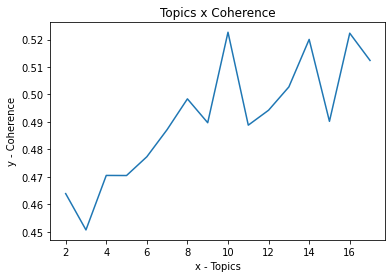

In [180]:
import matplotlib.pyplot as plt 

x = model_results['Topics']
y = model_results['Coherence']

plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - Topics') 
# naming the y axis 
plt.ylabel('y - Coherence') 
  
# giving a title to my graph 
plt.title('Topics x Coherence') 
  
# function to show the plot 
plt.show() 

In [181]:
model_results

{'Coherence': [0.46386910928239655,
  0.4506388093577575,
  0.4704922966875766,
  0.47045981540530357,
  0.47729633269809457,
  0.48719318031227604,
  0.49839153495330435,
  0.4897011919658414,
  0.5226713845502079,
  0.48881411539079217,
  0.49425664138202646,
  0.502745780535966,
  0.5200582810330614,
  0.490203569803688,
  0.5223272709856189,
  0.5123891590508457],
 'Topics': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}

## Primeiro modelo com 10 topicos

In [0]:
warnings.simplefilter('ignore')

np.random.seed(2018)
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary)

In [185]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.015*"coronavirus" + 0.014*"bolsonaro" + 0.008*"apos" + 0.006*"covid" + 0.006*"presidente" + 0.005*"brasil" + 0.005*"quarentenar" + 0.004*"reuniao" + 0.004*"casar" + 0.004*"saudar"
Topic: 1 
Words: 0.010*"coronavirus" + 0.010*"pandemia" + 0.006*"pedir" + 0.006*"apos" + 0.006*"isolamento" + 0.005*"brasil" + 0.005*"bolsonaro" + 0.005*"moro" + 0.005*"fechar" + 0.005*"medico"
Topic: 2 
Words: 0.024*"coronavirus" + 0.014*"covid" + 0.009*"paciente" + 0.006*"bolsonaro" + 0.006*"morte" + 0.005*"morto" + 0.005*"mascara" + 0.005*"brasil" + 0.005*"registrar" + 0.005*"caso"
Topic: 3 
Words: 0.011*"video" + 0.008*"covid" + 0.007*"brasil" + 0.007*"coronavirus" + 0.006*"morte" + 0.006*"pandemia" + 0.006*"isolamento" + 0.006*"numero" + 0.005*"paulo" + 0.005*"bolsonaro"
Topic: 4 
Words: 0.016*"coronavirus" + 0.009*"morte" + 0.008*"maio" + 0.006*"pedir" + 0.005*"video" + 0.005*"brasil" + 0.005*"governo" + 0.005*"morrer" + 0.004*"live" + 0.004*"apos"
Topic: 5 
Words: 0.018*"coronavirus"

In [186]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.132890 -0.023161       1        1  13.143156
7      0.040940  0.139373       2        1  11.665999
2     -0.043974 -0.000185       3        1  11.571763
6      0.046577 -0.060091       4        1  11.017011
0      0.056519 -0.059625       5        1  10.734179
5     -0.018741  0.077654       6        1   9.083912
1      0.103393 -0.030044       7        1   8.535422
3     -0.040618 -0.037545       8        1   8.411303
8      0.000219  0.029260       9        1   8.381913
4     -0.011425 -0.035636      10        1   7.455343, topic_info=            Term       Freq      Total Category  logprob  loglift
73         video  27.000000  27.000000  Default  30.0000  30.0000
227        morte  41.000000  41.000000  Default  29.0000  29.0000
24   coronavirus  93.000000  93.000000  Default  28.0000  28.0000
4       paciente  15.000000  15.000000  Default  27.0000  27.0000
76     bolsonaro  60.000000  60.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
70       publico   1.398311  16.111261  Topic10  -5.9467   0.1520
376       querer   1.398311   9.771018  Topic10  -5.9467   0.6521
88         estar   1.398311  11.999925  Topic10  -5.9467   0.4466
311         moro   1.398309  13.866964  Topic10  -5.9467   0.3020
445     lockdown   1.398308  13.378275  Topic10  -5.9467   0.3379

[760 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1650     10  0.732719     acalmar
75        2  0.359809        acao
75        9  0.359809        acao
486       4  0.471240     aceitar
2732      6  0.724229    acentuar
...     ...       ...         ...
2733      6  0.724229  xvtnvnmbpi
2764      7  0.722684        xwee
1678      6  0.724229     ykebwjv
2387      6  0.724229       ypwvo
2241     10  0.492455        zeca

[1443 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 3, 7, 1, 6, 2, 4, 9, 5])

In [187]:
from gensim.models import CoherenceModel# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5226713845502079
